# Поиск самых малоприбыльных рейсов из Анапы
## Описание
Выяснить, от каких самых малоприбыльных рейсов из Анапы мы можем отказаться в зимнее время

[ссылка на презентацию на GoogleDrive](https://docs.google.com/presentation/d/1ob7EeefcvAU4oVajAnFUwJsa-A1ihu6X/edit?usp=sharing&ouid=113177682178701184919&rtpof=true&sd=true)

## Задачи
* провести анализ данных
* сформулировать выводы

## Описание датасета

1. **scheduled_departure** – время отправления из г.Анапа 
    * период с 1-12-2016 по 28-02-2017
2. **arrival_airport**  - аэропорт прибытия
3. **сity** – город назначения
4. **flight_minutes** – время в пути (минуты)
5. **model** – модель самолета 
6. **seat_count** – кол-во мест в самолете
7. **ticket_count** – кол-во проданных билетов
8. **ticket_sum** – стоимость билетов в руб.

# Библиотеки

In [1]:
import datetime as dt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Функции

In [2]:
def two_bars(fl_idx, fl_val, xlabel, title1, title2, ylim1, ylim2, fsize=(15, 5)):
    ''' Отображает два графика. Первый в разрезе городов,  второй суммарный  '''

    flg, (ax1, ax2) = plt.subplots(1, 2, figsize=fsize)
    width = 0.34  # the width of the bars

    temp1 = df1.pivot_table(index=fl_idx, columns='city', values=fl_val)
    temp2 = df1.pivot_table(index=fl_idx, values=fl_val)

    index = np.arange(temp1.shape[0])
    ax1.bar(index - width/2, temp1[temp1.columns[0]],
            width, label=temp1.columns[0])
    ax1.bar(index + width/2, temp1[temp1.columns[1]],
            width, label=temp1.columns[1])
    ax1.set_title(title1)
    ax1.set_xticks(index)
    ax1.set_xticklabels(xlabel)
    ax1.set_ylim(ylim1[0], ylim1[1])
    ax1.legend()
    ax1.grid()

    ax2.bar(temp2.index, temp2[fl_val], 1.3*width)
    ax2.set_title(title2)
    ax2.set_xticks(temp2.index)
    ax2.set_xticklabels(xlabel)
    ax2.set_ylim(ylim2[0], ylim2[1])
    ax2.grid()

    plt.show()
    return None

# Данные

In [3]:
df = pd.read_csv('data-2016_12_2017_01_02_full.csv')
df.sample(5)

,scheduled_departure,arrival_airport,city,flight_minutes,model,seat_count,ticket_count,ticket_sum
130,2017-01-31 06:10:00+00,NOZ,Novokuznetsk,304,Boeing 737-300,130,NaN,NaN
28,2016-12-14 09:25:00+00,EGO,Belgorod,50,Sukhoi Superjet-100,97,97.0,765300.0
124,2017-01-28 09:25:00+00,EGO,Belgorod,50,Sukhoi Superjet-100,97,80.0,631200.0
75,2017-01-05 09:25:00+00,EGO,Belgorod,51,Sukhoi Superjet-100,97,82.0,633000.0
131,2017-01-31 09:25:00+00,EGO,Belgorod,50,Sukhoi Superjet-100,97,97.0,765300.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scheduled_departure  193 non-null    object 
 1   arrival_airport      193 non-null    object 
 2   city                 193 non-null    object 
 3   flight_minutes       193 non-null    int64  
 4   model                193 non-null    object 
 5   seat_count           193 non-null    int64  
 6   ticket_count         180 non-null    float64
 7   ticket_sum           180 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.2+ KB


Belgorod        90
Moscow          90
Novokuznetsk    13
Name: city, dtype: int64

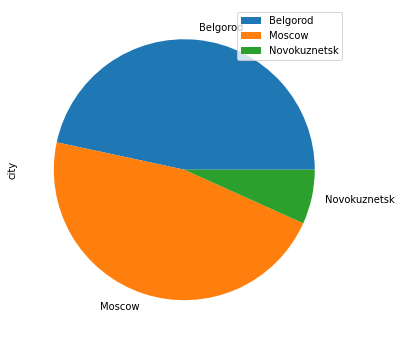

In [5]:
# количество рейсов по городам
display(df['city'].value_counts())
plt.rcParams['figure.figsize'] = (6, 6)
df['city'].value_counts().plot(kind='pie')
plt.legend()

city
Belgorod        90
Moscow          90
Novokuznetsk     0
Name: ticket_count, dtype: int64

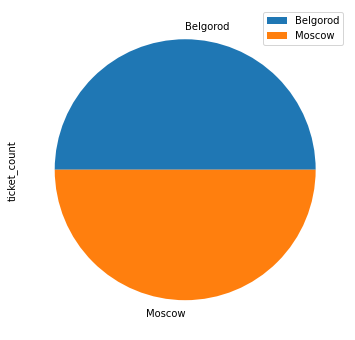

In [6]:
# кол-во рейсов по городам (без учета Nal в поле 'кол-во проданных билетов')
display(df.groupby('city')['ticket_count'].count())
plt.rcParams['figure.figsize'] = (6, 6)
df.groupby('city')['ticket_count'].count().plot(kind='pie')
plt.legend()

К сожалению, данные о кол-ве проданных билетах в Новокузнецк отсутстуют. <br>
И из дальнейшего анализа этот город выбывает((( 

In [7]:
# удалим все данные по Новокузнецку, т.к. по нему нет данных о проданных билетах
df1 = df.dropna(axis=0).copy()

<AxesSubplot:title={'center':'Количество проданных билетов по городам'}, xlabel='city'>

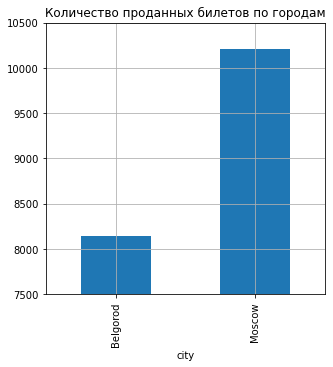

In [8]:
# Посмотрим на кол-во проданных билетов за всю зиму
plt.rcParams['figure.figsize'] = (5, 5)
df1.groupby(['city'])['ticket_count'].sum().plot(kind='bar',
                                                 grid=True,
                                                 ylim=(7500, 10500),
                                                 title='Количество проданных билетов по городам')

<AxesSubplot:title={'center':'Заполняемость рейсов по городам'}, xlabel='city'>

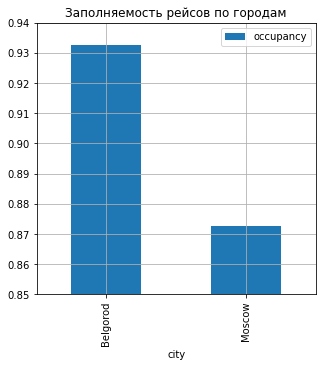

In [9]:
# Расчитаем заполняемость каждого рейса
df1['occupancy'] = df1['ticket_count']/df1['seat_count']
# и посмотрим на графике среднюю заполняемость за всю зиму
plt.rcParams['figure.figsize'] = (5, 5)
df1.pivot_table(index='city', values='occupancy').plot(
    kind='bar', grid=True, ylim=(0.85, 0.94), title='Заполняемость рейсов по городам')

Как видно билетов в Москву проданно больше, чем в Белгород, а вот заполняемость рейсов в Белгород лучше.

Видно, что по кол-ву посадочных мест модель самолета в Белгород была выбрана более оптимально . 

In [10]:
# Посмотрим какие у нас модели самолетов задействованы
df1.model.value_counts()

Boeing 737-300         90
Sukhoi Superjet-100    90
Name: model, dtype: int64

<AxesSubplot:title={'center':'Прибыль по городам за зиму'}, xlabel='city'>

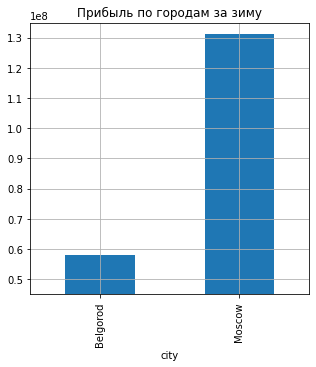

In [11]:
# Согласно нашим данным
# из Анапы в Москву летает Boeing 737-300
# из Анапы в Белгород летает Sukhoi Superjet-100
# Согласно http://newsruss.ru/doc/index.php/Расход_топлива_у_самолетов часовой расход топлива
# Boeing 737-300 :  2400 кг
# Sukhoi Superjet-100 : 1700 кг
# Airbus A320-200 : 2500 кг
# Airbus A319-100 : 2350 кг

# Стоимость авиационного керосина в Анапе соглассно официальным данным
# с (https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/)
# без НДС: 38867 (декабрь 2016) 41435(январь 2017) 39553 (февраль 2017)
# с НДС: 45863 (декабрь 2016) 48893(январь 2017) 46673 (февраль 2017)
# Возьмем среднюю с НДС для упрощения расчетов = 47143

# Расчитаем прибыль по упрощенной схеме (стоимость билетов – стоимость топлива)
df1['profit'] = df1.apply(lambda r: r[7] - round(r[3]*47143 *
                          (1.7 if r[4] == 'Sukhoi Superjet-100' else 2.4)/60), axis=1)
# и посмотрим нашу прибыль на графике:
plt.rcParams['figure.figsize'] = (5, 5)
df1.groupby(['city'])['profit'].sum().plot(kind='bar', grid=True,
                                           ylim=(45000000, 135000000), 
                                           title='Прибыль по городам за зиму')

Как и ожидалось (выше был график по кол-ву проданных билетов) прибыль по рейсам в Москву значительно больше. 

У нас в базе всего два направления и на каждом из направлений по одной модели самолета, <br> 
так же у нас каждый день есть по одному рейсу в Москву и 1 рейсу Белгород. Особо не разгуляешься (((

Остается посмотреть разные варианты представления даты (месяц, день недели, выходные\рабочие). Надеюсь тут что-то найдется интересного. 

In [12]:
# Выделим дату
df1['date_departure'] = pd.to_datetime(df1.scheduled_departure).dt.date
# Пробовала выделить час вылета, но в нашем наборе рейсы улетают
# всегда в одно и то же время.
# df1['hour_departure']=pd.to_datetime(df1.scheduled_departure).dt.hour

# Выделим год_месяц
df1['month_departure'] = pd.to_datetime(
    df1.scheduled_departure).dt.strftime('%Y_%m')
# Выделим день недели
df1['weekday_departure'] = pd.to_datetime(df1.scheduled_departure).dt.weekday
# Пометим рабочие дни(1-рабочий, 0-выходной или праздник)
df1['workday_departure'] = df1.weekday_departure.apply(
    lambda x: 1 if x < 5 else 0)
df1.loc[(df1['date_departure'].between(dt.date(2017, 1, 2),
         dt.date(2017, 1, 6))), 'workday_departure'] = 0
df1.loc[(df1['date_departure'].between(dt.date(2017, 2, 23),
         dt.date(2017, 2, 24))), 'workday_departure'] = 0

### Теперь можно строить разные варианты Заполняемости самолетов и Прибыли

<AxesSubplot:title={'center':'Прибыль по дням'}, xlabel='date_departure'>

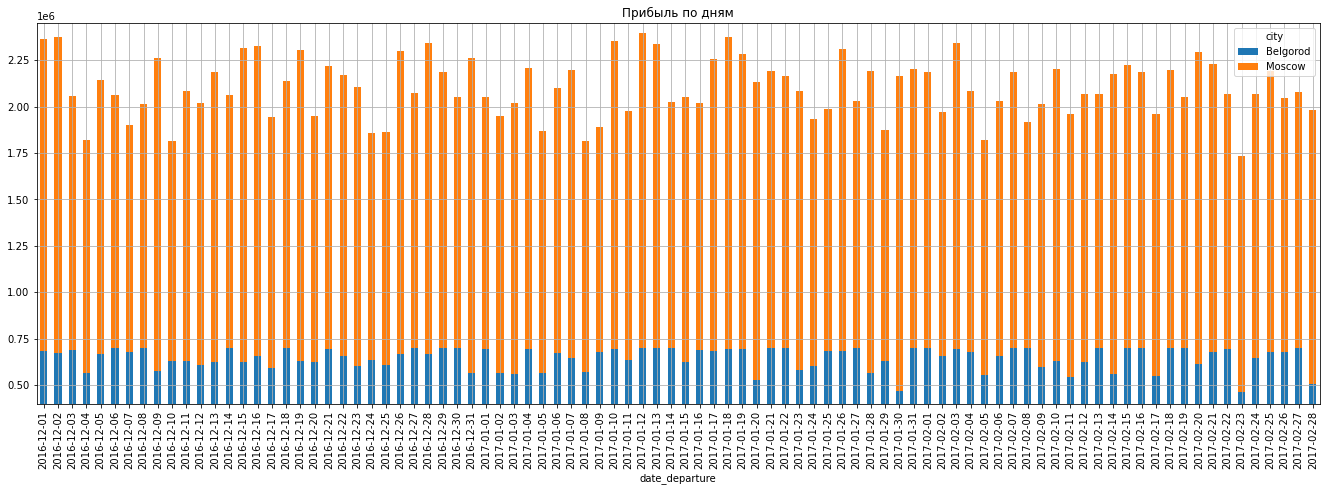

In [13]:
fl = 'date_departure'
plt.rcParams['figure.figsize'] = (23, 7)
df1.pivot_table(index=fl, columns='city', values='profit').plot(
    kind='bar',
    grid=True,
    ylim=(400000, 2450000),
    stacked=True,
    title='Прибыль по дням')

<AxesSubplot:title={'center':'Заполняемость рейсов по дням'}, xlabel='date_departure'>

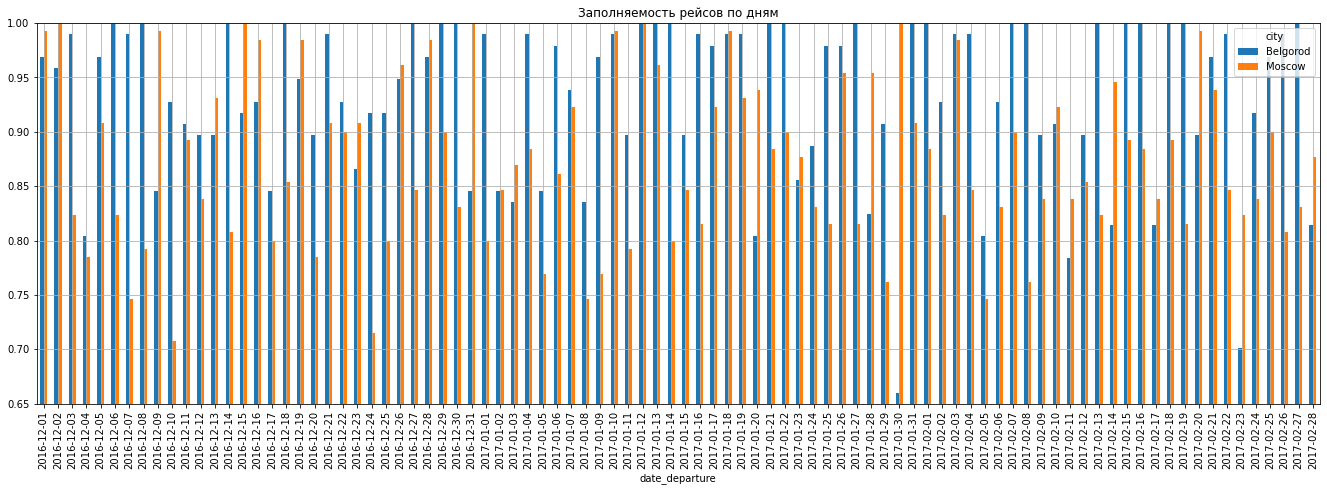

In [14]:
fl = 'date_departure'
plt.rcParams['figure.figsize'] = (23, 7)
df1.pivot_table(index=fl, columns='city', values='occupancy').plot(
    kind='bar',
    grid=True,
    ylim=(0.65, 1.0),
    title='Заполняемость рейсов по дням')

<AxesSubplot:title={'center':'Заполняемость рейсов по всем городам по дням'}, xlabel='date_departure'>

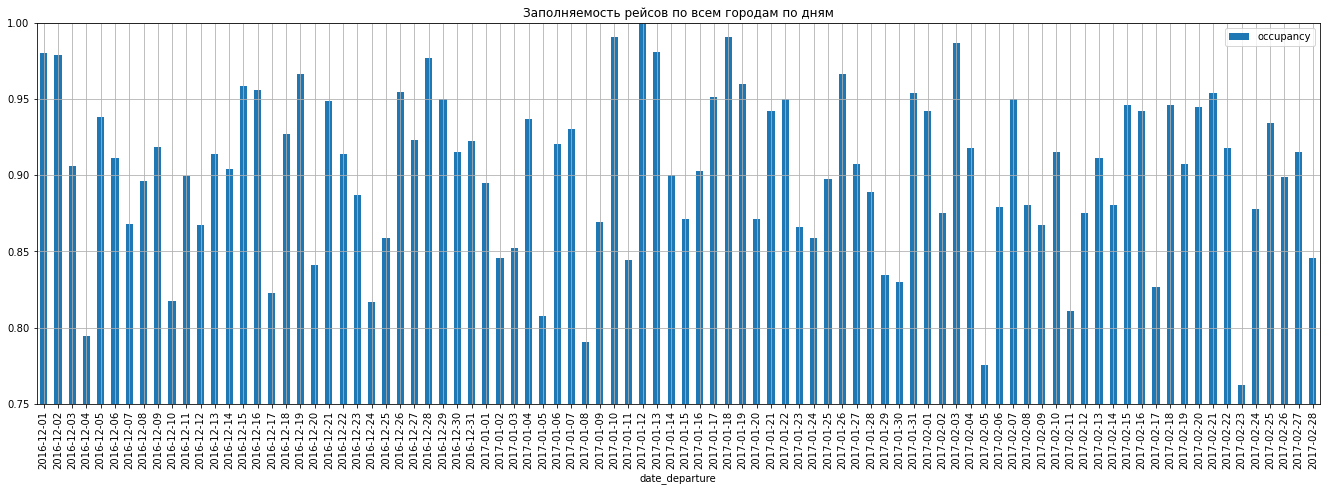

In [15]:
fl = 'date_departure'
plt.rcParams['figure.figsize'] = (23, 7)
df1.pivot_table(index=fl, values='occupancy').plot(kind='bar',
                                                   grid=True,
                                                   ylim=(0.75, 1.0),
                                                   title='Заполняемость рейсов по всем городам по дням')

Видно что есть удачные дни и не очень, но пока не совсем понятно с чем это связано.

Посмотрим по месяцам и дням недели.

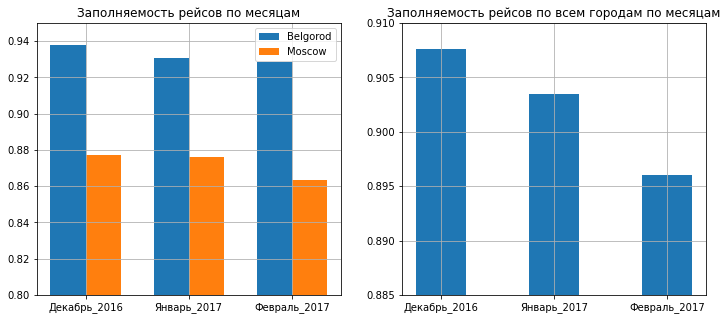

In [16]:
two_bars(
    fl_idx='month_departure',
    fl_val='occupancy',
    xlabel=['Декабрь_2016', 'Январь_2017', 'Февраль_2017'],
    title1='Заполняемость рейсов по месяцам',
    title2='Заполняемость рейсов по всем городам по месяцам',
    ylim1=(0.8, 0.95),
    ylim2=(0.885, 0.91),
    fsize=(12, 5))

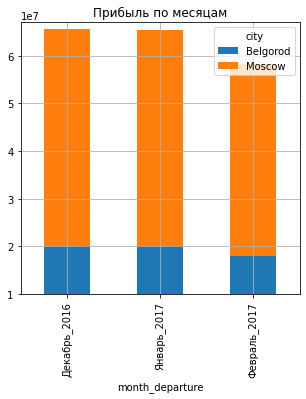

In [17]:
# прибыль по месяцам с накопительным итогом
fl = 'month_departure'
xlabel = ['Декабрь_2016', 'Январь_2017', 'Февраль_2017']
plt.rcParams['figure.figsize'] = (5, 5)
ax = df1.pivot_table(index=fl,
                     columns='city',
                     values='profit',
                     aggfunc=np.sum).plot(kind='bar',
                                          grid=True,
                                          ylim=(10000000, 67000000),
                                          stacked=True,
                                          title='Прибыль по месяцам')
ax.set_xticklabels(xlabel)
plt.show()

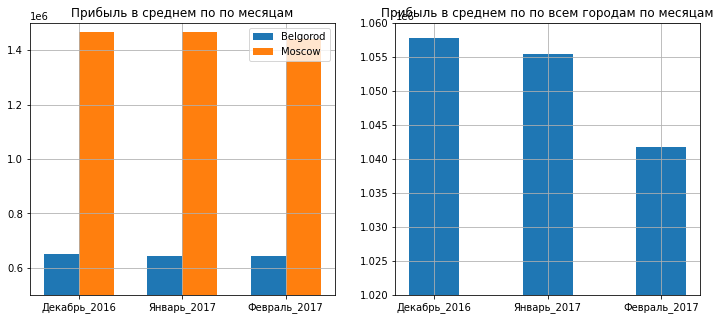

In [18]:
two_bars(
    fl_idx='month_departure',
    fl_val='profit',
    xlabel=['Декабрь_2016', 'Январь_2017', 'Февраль_2017'],
    title1='Прибыль в среднем по по месяцам',
    title2='Прибыль в среднем по по всем городам по месяцам',
    ylim1=(500000, 1500000),
    ylim2=(1020000, 1060000),
    fsize=(12, 5))

Вот уже видно, что в феврале и прибыль и заполняемость рейсов заметно хуже чем в двух других месяцах.

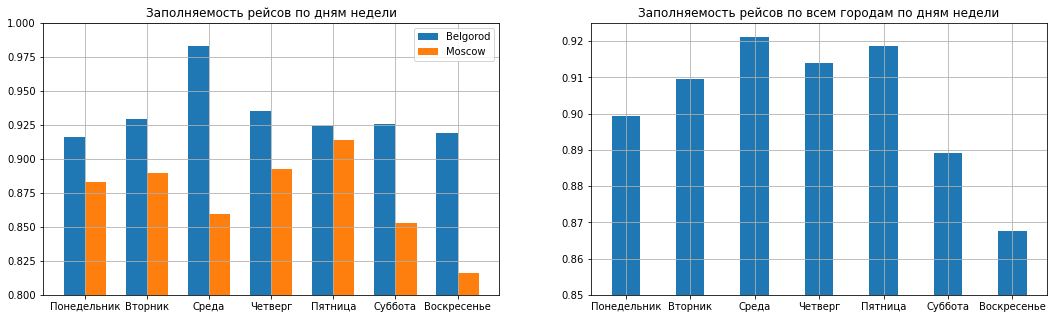

In [19]:
two_bars(
    fl_idx='weekday_departure',
    fl_val='occupancy',
    xlabel=['Понедельник', 'Вторник', 'Среда',
            'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
    title1='Заполняемость рейсов по дням недели',
    title2='Заполняемость рейсов по всем городам по дням недели',
    ylim1=(0.8, 1.0),
    ylim2=(0.85, 0.925),
    fsize=(18, 5))

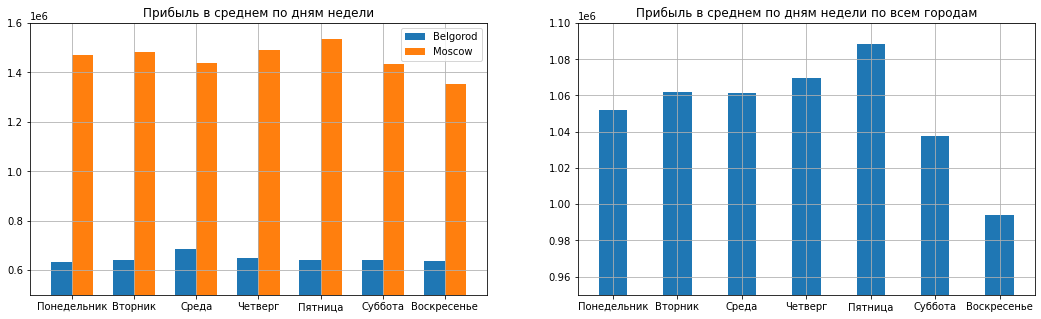

In [20]:
two_bars(
    fl_idx='weekday_departure',
    fl_val='profit',
    xlabel=['Понедельник', 'Вторник', 'Среда',
            'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
    title1='Прибыль в среднем по дням недели',
    title2='Прибыль в среднем по дням недели по всем городам',
    ylim1=(500000, 1600000),
    ylim2=(950000, 1100000),
    fsize=(18, 5))

Вот здесь видно, что рейсы в выходные (суббота и воскресенье) менее прибыльны и менее заполнены.

Еще хотела обратить внимание на рейсы по средам в Москву. Загруженнось рейсов на уровни субботы.

ну и еще можно посмотреть в разрезе рабочий\не рабочий день:

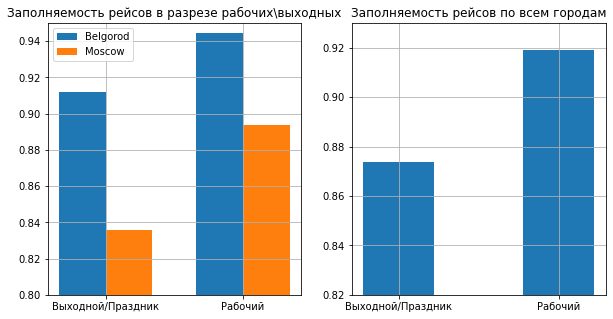

In [21]:
two_bars(
    fl_idx='workday_departure',
    fl_val='occupancy',
    xlabel=['Выходной/Праздник', 'Рабочий'],
    title1='Заполняемость рейсов в разрезе рабочих\выходных',
    title2='Заполняемость рейсов по всем городам',
    ylim1=(0.8, 0.95),
    ylim2=(0.82, 0.93),
    fsize=(10, 5))

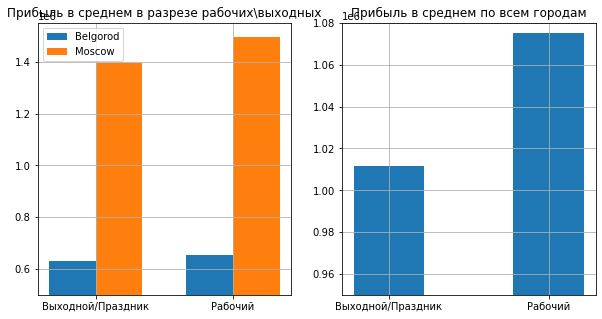

In [22]:
two_bars(
    fl_idx='workday_departure',
    fl_val='profit',
    xlabel=['Выходной/Праздник', 'Рабочий'],
    title1='Прибыль в среднем в разрезе рабочих\выходных',
    title2='Прибыль в среднем по всем городам',
    ylim1=(500000, 1550000),
    ylim2=(950000, 1080000),
    fsize=(10, 5))

Данные подтвердились. В не рабочие дни люди реже летают из Анапы в Москву и Белгород.

# Итоги

В результате анализа данных можно сделать следующие выводы:
- Рейсы в феврале менее прибыльные и менее заполненные
- Московские рейсы более прибыльные, чем Белгородские, несмотря на то, что самолет в Белгород летает более экономный по топливу
- Белгородские рейсы в общей массе чуть более заполненные, хотя минимум принадлежит именно рейсу в Белгород (0.66)
- Рейсы в выходные менее прибыльны и менее заполнены по обоим направлениям
- Рейсы в Москву по средам так же мало заполнены

## Рекомендации:
Рекомендовать отказаться от рейсов не буду, т.к. требуется более глубокий анализ ситуации (не знаю правильных терминов, но если, например, самолет базируется не в Анапе, и должен летаетать и возвращаеться в другой город, то говорить об отмене рейса только в одну сторону не правильно; так же не хватает знаний, чтобы правильно оценить уровень других расходов).

- Так как рейсы в Белгород малоприбыльные (по сравнению с московскими), но хорошо заполнены, то возможно, стоит рассмотреть вопрос об увеличении цены билеты.
- Возможно в выходные\праздничные дни стоит заменить самолеты на менее вместительные и экономные по топливу. 
- Рассмотреть вопрос по рейсам в среду в Москву: возможно стоит в эти дни заменить самолеты на менее вместительные и экономные по топливу (как вариант Airbus A319-100).

